In [20]:
# Imports das bibliotecas/classes necessarias
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Input, Conv2D, Dense, Flatten, Dropout, GlobalMaxPooling2D, MaxPooling2D, BatchNormalization
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam

In [2]:
# Carregando o dataset Fashion MNIST
fashion_mnist = tf.keras.datasets.fashion_mnist

# Separando os dados de treino e teste
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

# Escalando os dados
X_train, X_test = X_train/255.0, X_test/255.0

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [3]:
# Adicionando uma camada a mais as imagens (estão em grayscale, aka 2d)
# uma CNN espera dados 3D
X_train = np.expand_dims(X_train, -1)
X_test = np.expand_dims(X_test, -1)
X_train.shape

(60000, 28, 28, 1)

In [4]:
# Numero de classes do modelo
K = len(set(y_train))
print(f'Number of classes {K}')

Number of classes 10


In [26]:
# Aplicando Batch normalization para tentar aumentar o
# desempenho da rede

# Input
i = Input(shape=X_train[0].shape)

# Conv Layers
x = Conv2D(32, (3,3), activation='relu', padding='same')(i)
x = BatchNormalization()(x)
x = Conv2D(32, (3,3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = MaxPooling2D((2, 2))(x)
x = Conv2D(64, (3,3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = Conv2D(64, (3,3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = MaxPooling2D((2, 2))(x)
x = Conv2D(128, (3,3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = Conv2D(128, (3,3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = MaxPooling2D((2, 2))(x)

# Dense Layers
x = Flatten()(x)
x = Dropout(0.5)(x)
x = Dense(1024, activation='relu',)(x)
x = Dropout(0.2)(x)
x = Dense(K, activation='softmax',)(x)

model = Model(i, x)

In [28]:
# Compila o modelo com o otimizador adam,
# Função custo sparse categorical crossentropy
# E metrica de precisao
model.compile(optimizer=Adam(learning_rate=0.0001),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'],
)

In [33]:
r = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=20)

Epoch 1/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.8539 - loss: 0.4042 - val_accuracy: 0.8899 - val_loss: 0.3084
Epoch 2/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.8912 - loss: 0.2967 - val_accuracy: 0.9059 - val_loss: 0.2591
Epoch 3/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9045 - loss: 0.2522 - val_accuracy: 0.9075 - val_loss: 0.2483
Epoch 4/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9177 - loss: 0.2233 - val_accuracy: 0.9091 - val_loss: 0.2419
Epoch 5/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.9270 - loss: 0.2002 - val_accuracy: 0.9139 - val_loss: 0.2293
Epoch 6/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.9316 - loss: 0.1851 - val_accuracy: 0.9239 - val_loss: 0.2097
Epoch 7/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 21s 6ms/step - accuracy: 0.9388 - loss: 0.1643 - val_accuracy: 0.9223 - val_loss: 0.2093
Epoch 8/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 19s 5ms/step - accuracy: 0.9430 - loss: 0

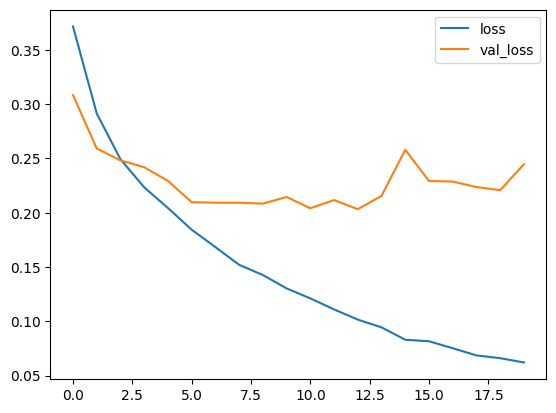

In [34]:
# Plots da função custo por iteração
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()

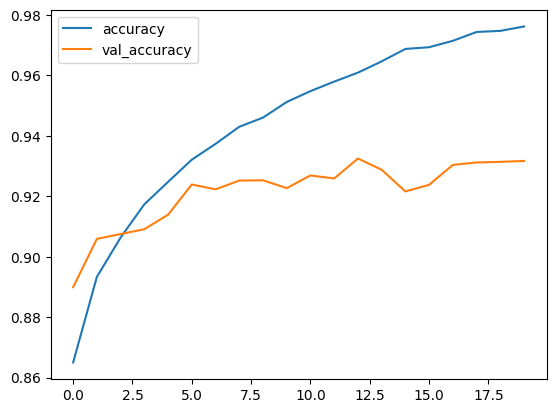

In [35]:
# Plots da precisão por iteração
plt.plot(r.history['accuracy'], label='accuracy')
plt.plot(r.history['val_accuracy'], label='val_accuracy')
plt.legend()

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step
Confusion matrix, without normalization
[[909   1  20   8   2   2  49   0   9   0]
 [  0 993   0   5   0   0   0   0   2   0]
 [ 13   1 903   6  40   0  36   0   1   0]
 [ 13   6   9 929  22   0  19   0   1   1]
 [  0   0  33  18 925   0  22   0   2   0]
 [  0   0   0   0   0 993   0   3   0   4]
 [105   1  54  18  83   0 734   0   5   0]
 [  0   0   0   0   0  12   0 977   0  11]
 [  0   0   1   2   0   1   0   0 996   0]
 [  0   0   1   0   0   6   0  35   0 958]]


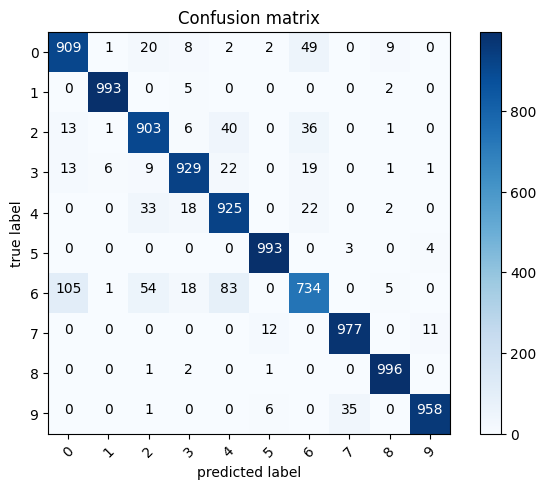

In [36]:
# Plot da matriz de confusão
from sklearn.metrics import confusion_matrix
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):

  # Verifica se a matriz será nromalizada
  if normalize:
    # Normaliza a matriz (caso necessario)
    cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    print('Normalized confusion matrix')
  else:
    print('Confusion matrix, without normalization')



  # Printa a matriz crua
  print(cm)

  # Plot da matriz com matplotlib

  plt.imshow(cm, interpolation='nearest', cmap=cmap)
  plt.title(title)
  plt.colorbar()
  tick_marks = np.arange(len(classes))
  plt.xticks(tick_marks, classes, rotation=45)
  plt.yticks(tick_marks, classes)

  fmt = '.2f' if normalize else 'd'
  thresh = cm.max() / 2
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, format(cm[i, j], fmt),
             horizontalalignment='center',
             color='white' if cm[i, j] > thresh else 'black')

  plt.tight_layout()
  plt.ylabel('true label')
  plt.xlabel('predicted label')
  plt.show()


# Gera a matriz com os casos de teste e chama a função
p_test = model.predict(X_test).argmax(axis=1)
cm = confusion_matrix(y_test, p_test)
plot_confusion_matrix(cm, list(range(10)))

In [37]:
# Mapa de rótulos
labels = ''' T-shirt/top
Trouser
Pullover
Dress
Coat
Sandal
Shirt
Sneaker
Bag
Ankle boot'''.split()

Text(0.5, 1.0, 'True label: Pullover\n Predicted: Coat')

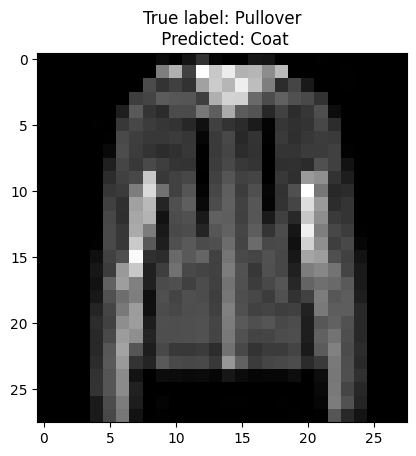

In [38]:
# Separa as predições erradas
missclassified_idx = np.where(p_test != y_test)[0]
# Escolhe uma de forma aleatoria
i = np.random.choice(missclassified_idx)
# Plota mostrando a predição e a classe correta
plt.imshow(X_test[i].reshape(28,28), cmap='gray')
plt.title(f'True label: {labels[y_test[i]]}\n Predicted: {labels[p_test[i]]}')

A utilização das camadas de normalização trouxeram pequenos aumentos para a accuracy e um leve declinio na loss. O desempenho ficou praticamente o mesmo porem com um maior tempo de treino.